In [48]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('data/AirQuality.csv', delimiter=';')

# Convertir las fechas y horas
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
# Crear las variables derivadas de 'Date'
df['Dia'] = df['Date'].dt.day
df['Mes'] = df['Date'].dt.month
df['Anio'] = df['Date'].dt.year

df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce').dt.time

# Mapear días de la semana a números
df['DiaSemana'] = df['Date'].dt.day_name()
dias_semana_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['DiaSemana'] = df['DiaSemana'].map(dias_semana_map)

# Categorizar por partes del día
def time_to_period(hour):
    if 6 <= hour < 12:
        return 0 #Día
    elif 12 <= hour < 18:
        return 1 #Tarde
    else:
        return 2 #Noche

df['PeriodoDia'] = df['Time'].apply(lambda t: time_to_period(t.hour) if pd.notnull(t) else None)

# Reemplazar comas por puntos y convertir columnas a float
columns_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '.', regex=False).astype(float)

# Convertir todas las columnas numéricas a enteros si no tienen decimales
for col in df.select_dtypes(include=['float', 'int']).columns:
    if df[col].dropna().mod(1).eq(0).all():  # Verifica si todos los valores son enteros
        df[col] = df[col].astype('Int64')  # Convierte a entero compatible con NaN

# Configuración para que no muestre decimales en pandas
pd.set_option('display.float_format', '{:.0f}'.format)

# Eliminar columnas innecesarias
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'Time'], errors='ignore')

# Eliminar filas con valores faltantes
df_cleaned = df.dropna()

# Mostrar información y primeros registros
print("Tipos de datos:")
print(df_cleaned.dtypes)
print("\nPrimeros registros:")
print(df_cleaned.head())


Tipos de datos:
Date             datetime64[ns]
CO(GT)                  float64
PT08.S1(CO)               Int64
NMHC(GT)                  Int64
C6H6(GT)                float64
PT08.S2(NMHC)             Int64
NOx(GT)                   Int64
PT08.S3(NOx)              Int64
NO2(GT)                   Int64
PT08.S4(NO2)              Int64
PT08.S5(O3)               Int64
T                       float64
RH                      float64
AH                      float64
Dia                       Int64
Mes                       Int64
Anio                      Int64
DiaSemana                 Int64
PeriodoDia                Int64
dtype: object

Primeros registros:
        Date  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10       3         1360       150        12           1046      166   
1 2004-03-10       2         1292       112         9            955      103   
2 2004-03-10       2         1402        88         9            939      131   
3 2004-03-10     

In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas relevantes de gases contaminantes
gases_contaminantes = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# Convertir las columnas de gases contaminantes a tipo numérico, manejando errores
df[gases_contaminantes] = df[gases_contaminantes].apply(pd.to_numeric, errors='coerce')

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas de gases contaminantes
df[gases_contaminantes] = scaler.fit_transform(df[gases_contaminantes])

# Calcular la media de los gases contaminantes para cada fila
df['indeceContaminacion'] = df[gases_contaminantes].mean(axis=1)

# Normalizar el índice usando MinMaxScaler
df['indeceContaminacion'] = scaler.fit_transform(df[['indeceContaminacion']])

# Mostrar el resultado
print(df[['indeceContaminacion']].head())




   indeceContaminacion
0                    1
1                    1
2                    1
3                    1
4                    1


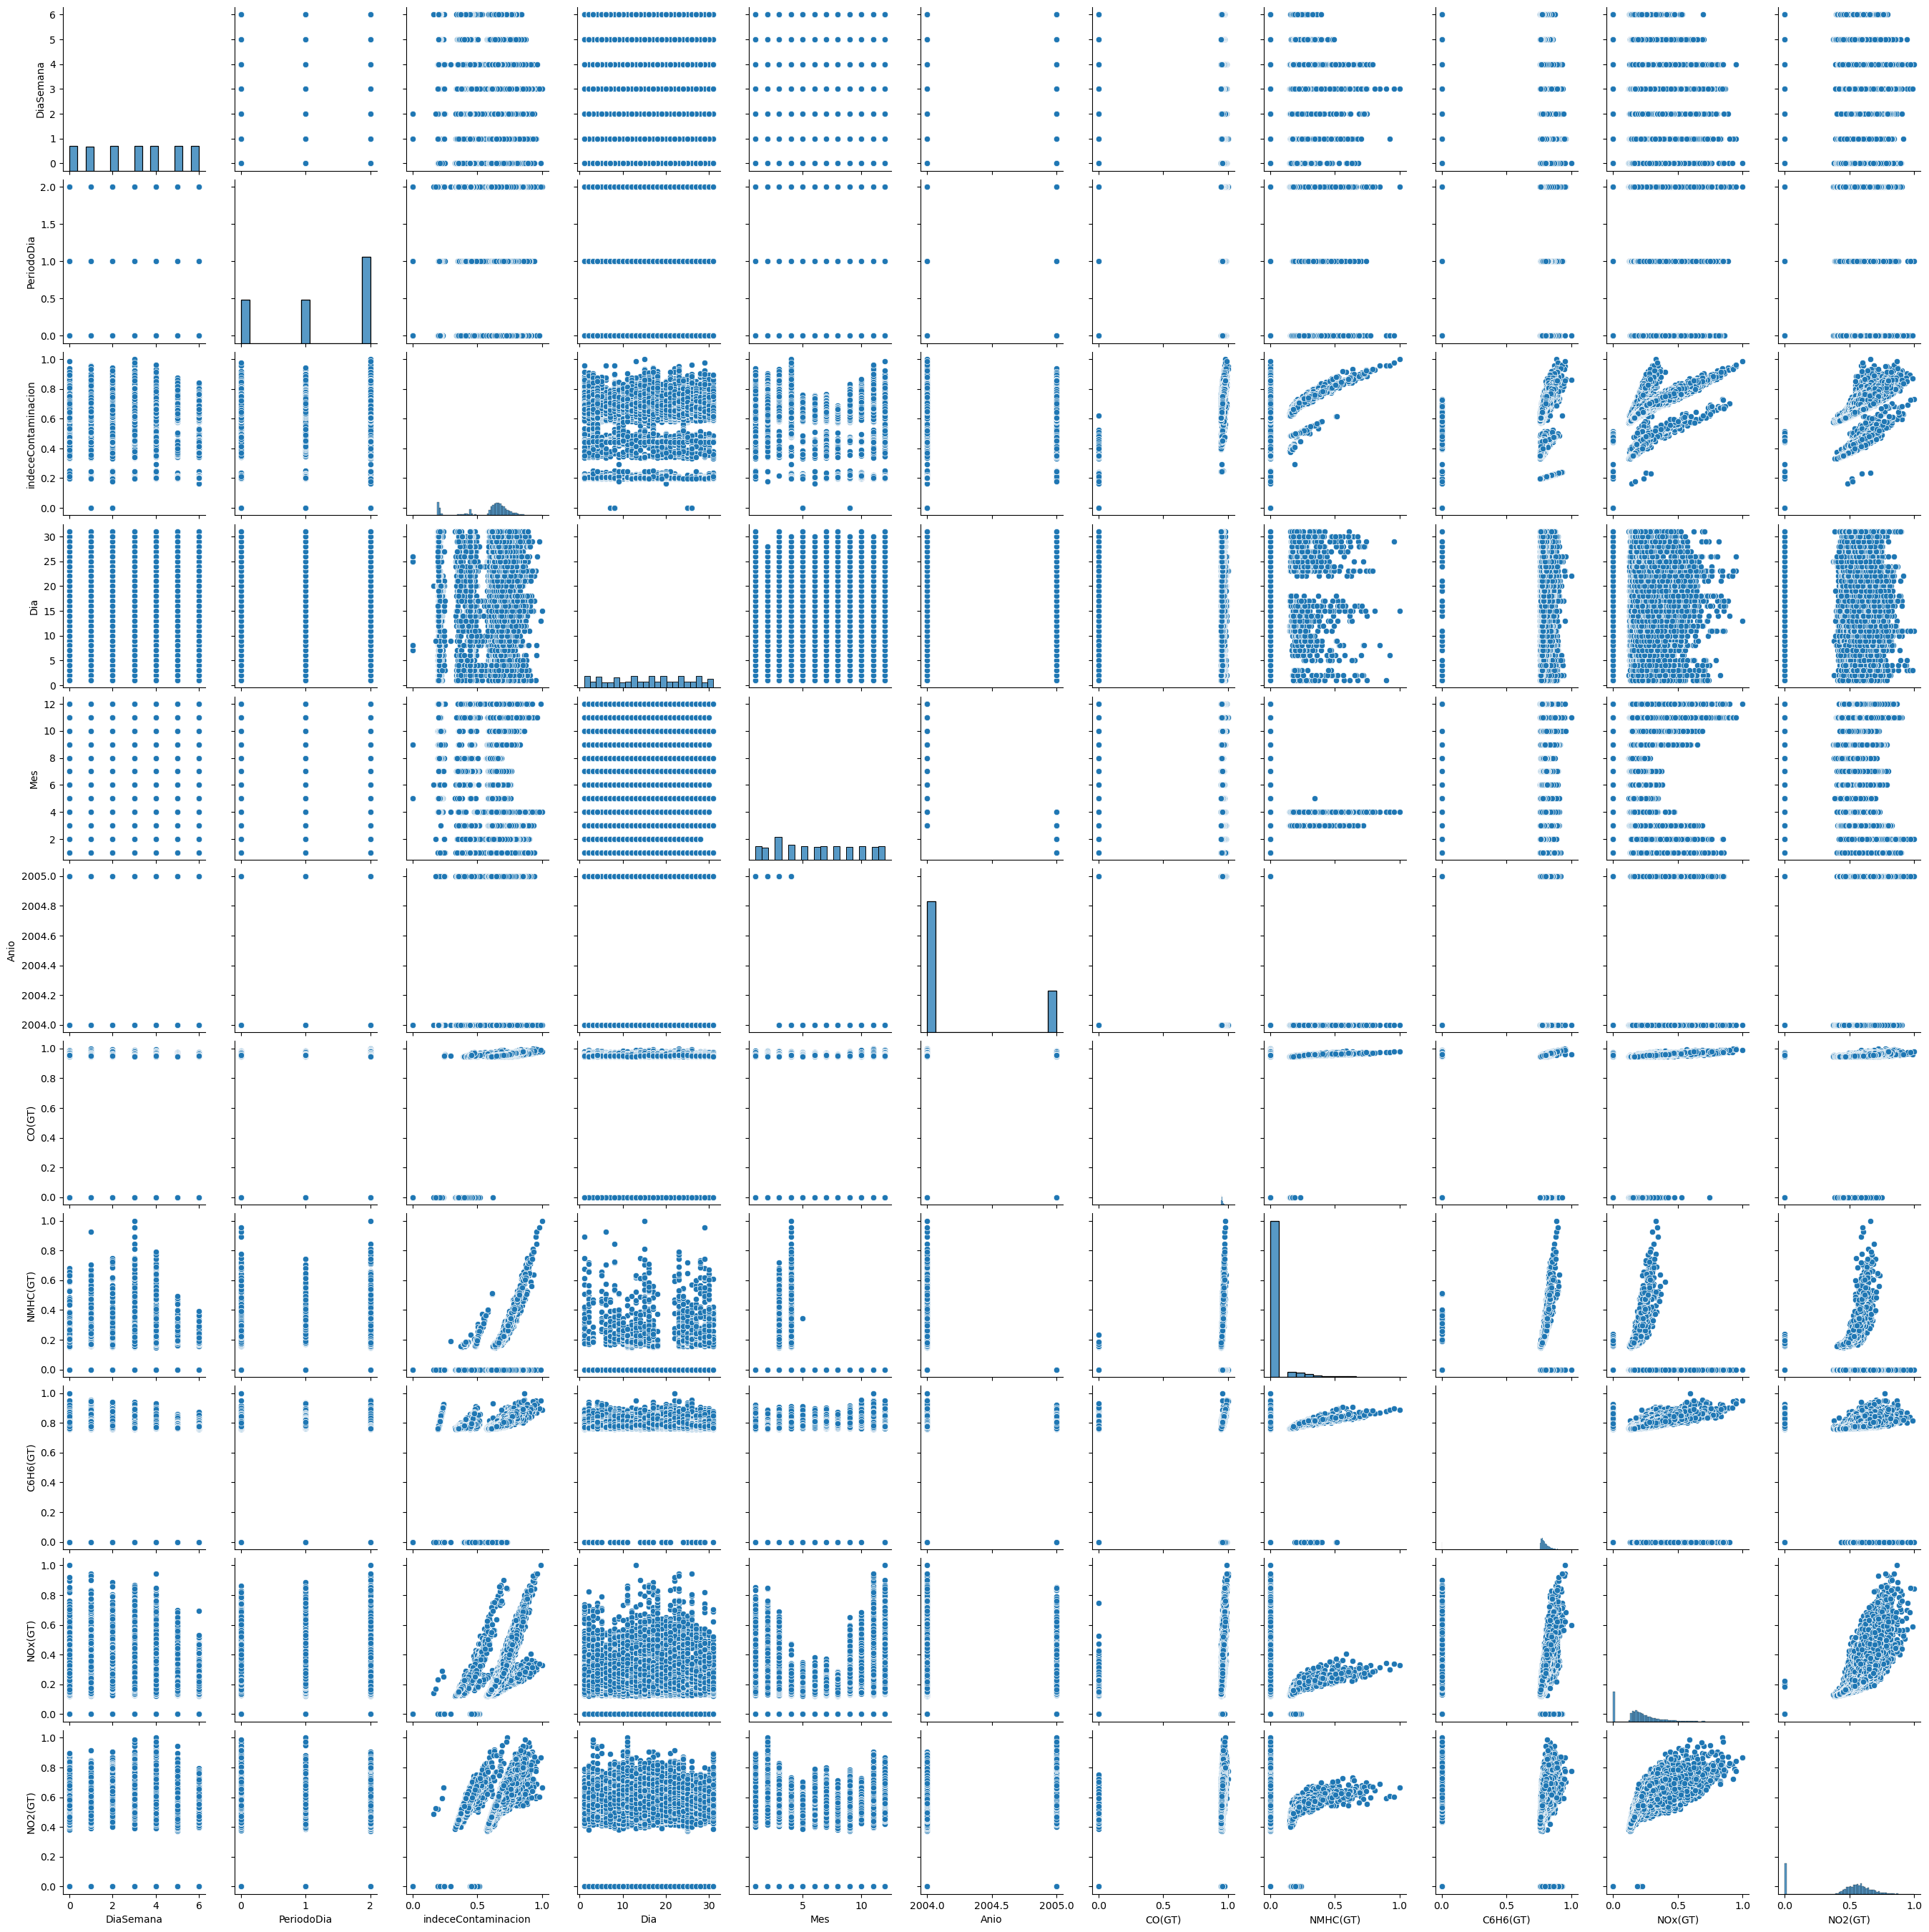

In [50]:
#  SACAR Pairplot 
import seaborn as sns
import matplotlib.pyplot as plt

# X = df[['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH', 'DiaSemana', 'PeriodoDia', 'indeceContaminacion' ]] 
# y = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]

X = df[['DiaSemana', 'PeriodoDia', 'indeceContaminacion','Dia', 'Mes', 'Anio' ]] 
y = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]
# Concatenar las variables de gases con las variables transformadas para visualizar todo en el pairplot
X_with_gases = pd.concat([X, y], axis=1)

# Crear el pairplot para comparar las variables de gases con las características
sns.pairplot(X_with_gases)
plt.show()

pca

/var/folders/fd/z3cb3t1s7n7816f3nk96nlkc0000gn/T/ipykernel_58123/2356838263.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_with_gases_clean['cluster'] = kmeans.labels_


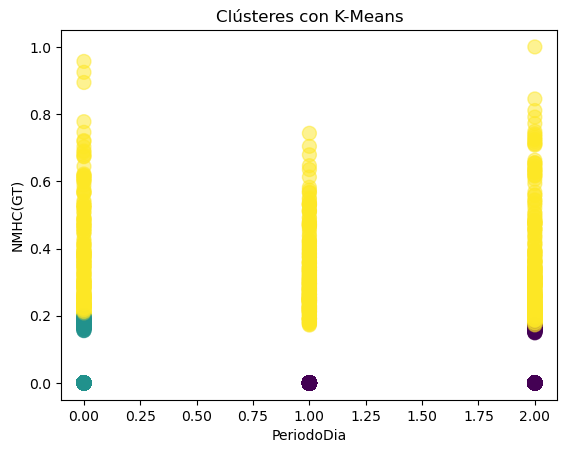

In [66]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Limpiar NaN
X_with_gases_clean = X_with_gases.dropna()

# Seleccionar las características relevantes
selected_features = ['PeriodoDia', 'NMHC(GT)']
X_selected = X_with_gases_clean[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
X_with_gases_clean['cluster'] = kmeans.labels_

# Visualizar los clústeres
plt.scatter(X_selected[selected_features[0]], X_selected[selected_features[1]],
            c=X_with_gases_clean['cluster'], cmap='viridis', s=100, alpha=0.5)
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title('Clústeres con K-Means')
plt.show()


         DiaSemana  PeriodoDia  indeceContaminacion  Dia  Mes  Anio  CO(GT)  \
cluster                                                                       
0                3           2                    1   16    7  2004       1   
1                3           0                    1   16    7  2004       1   
2                3           1                    1   18    4  2004       1   

         NMHC(GT)  C6H6(GT)  NOx(GT)  NO2(GT)  
cluster                                        
0               0         1        0        0  
1               0         1        0        0  
2               0         1        0        1  


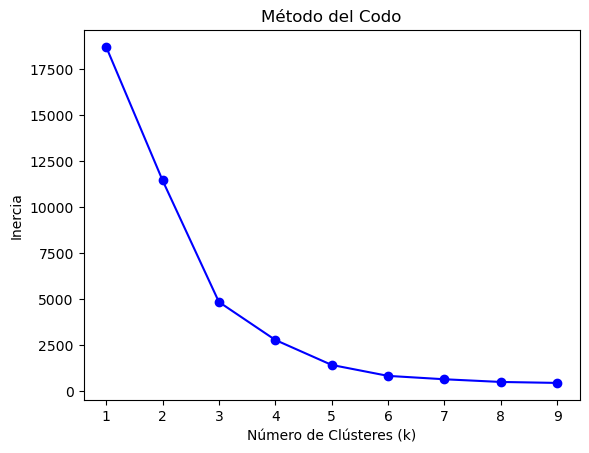

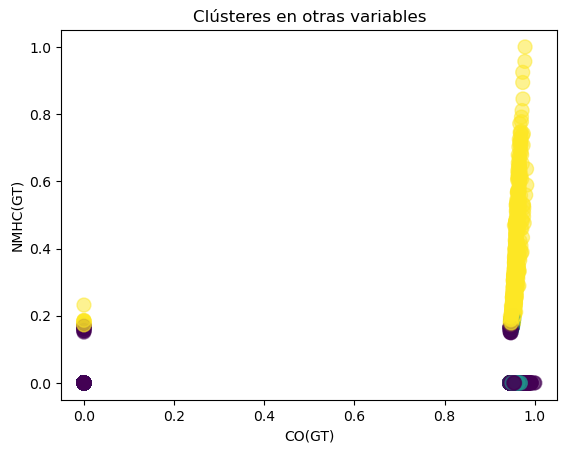

/var/folders/fd/z3cb3t1s7n7816f3nk96nlkc0000gn/T/ipykernel_58123/1910133688.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_with_gases_clean['cluster_label'] = X_with_gases_clean['cluster'].map({


Índice de silueta: 0.6993914778745369


In [76]:
cluster_stats = X_with_gases_clean.groupby('cluster').mean()
print(cluster_stats)

selected_features = ['PeriodoDia', 'NMHC(GT)', 'CO(GT)']


inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

plt.scatter(X_with_gases_clean['CO(GT)'], X_with_gases_clean['NMHC(GT)'],
            c=X_with_gases_clean['cluster'], cmap='viridis', s=100, alpha=0.5)
plt.xlabel('CO(GT)')
plt.ylabel('NMHC(GT)')
plt.title('Clústeres en otras variables')
plt.show()


X_with_gases_clean['cluster_label'] = X_with_gases_clean['cluster'].map({
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3'
})

from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Índice de silueta: {score}")


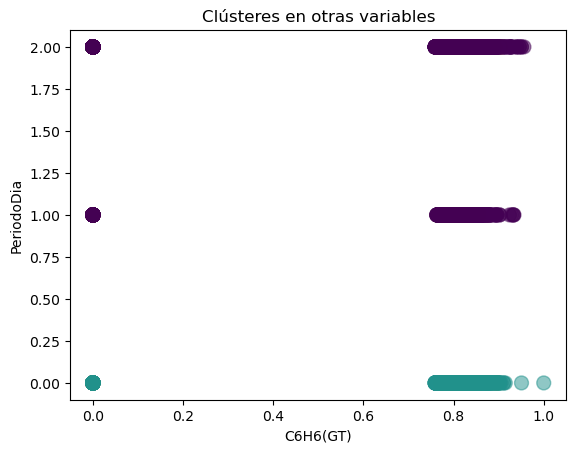

In [75]:
plt.scatter(X_with_gases_clean['C6H6(GT)'], X_with_gases_clean['PeriodoDia'],
            c=X_with_gases_clean['cluster'], cmap='viridis', s=100, alpha=0.5)
plt.xlabel('C6H6(GT)')
plt.ylabel('PeriodoDia')
plt.title('Clústeres en otras variables')
plt.show()


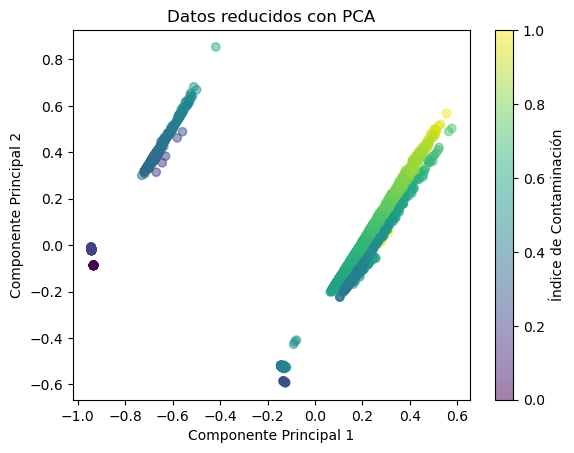

In [64]:
from sklearn.pipeline import Pipeline

# Crear un pipeline con imputación y PCA
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pca', PCA(n_components=2))
])

# Aplicar el pipeline a los datos
df_pca = pipeline.fit_transform(df[gases_contaminantes])

# Visualizar los datos en 2D después de PCA
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['indeceContaminacion'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Índice de Contaminación')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2') 
plt.title('Datos reducidos con PCA')
plt.show()


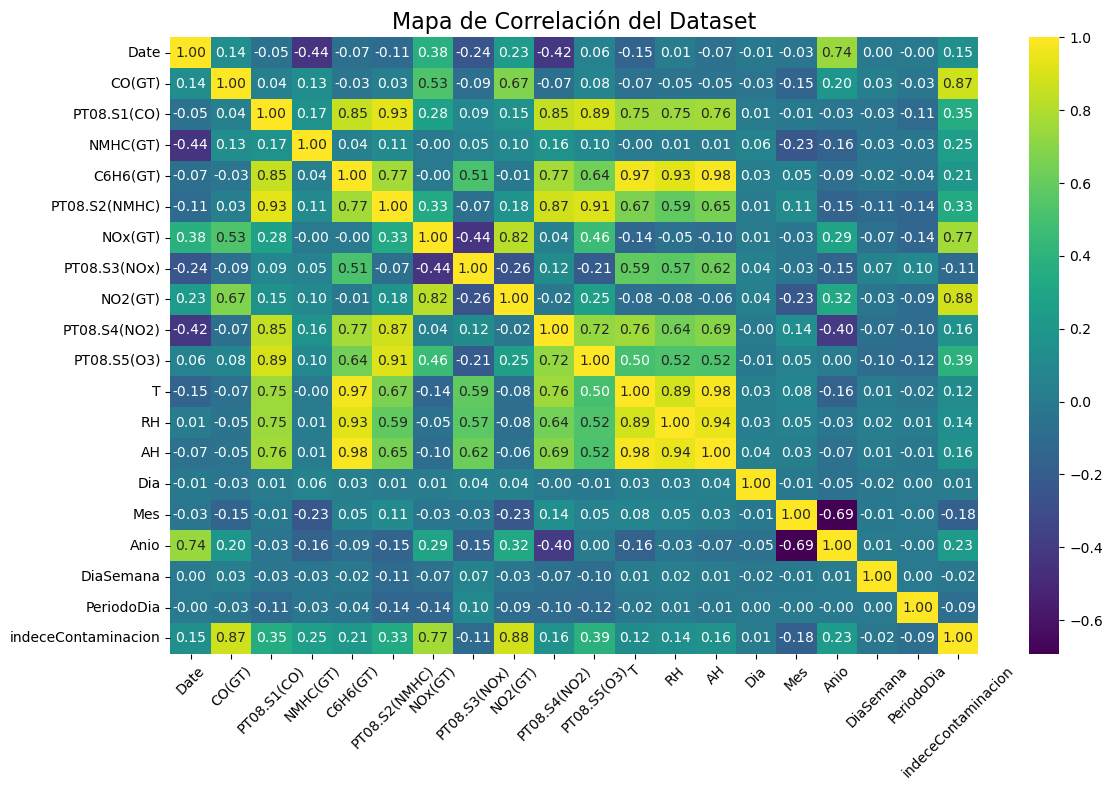

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_data = df.select_dtypes(include=['float64', 'int64', 'datetime64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True)

# Añadir título y ajustes
plt.title("Mapa de Correlación del Dataset", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

entrenamiento 

Aplicando modelo: K-Means
Aplicando modelo: DBSCAN
Aplicando modelo: GMM
Aplicando modelo: Agglomerative
Aplicando modelo: Spectral


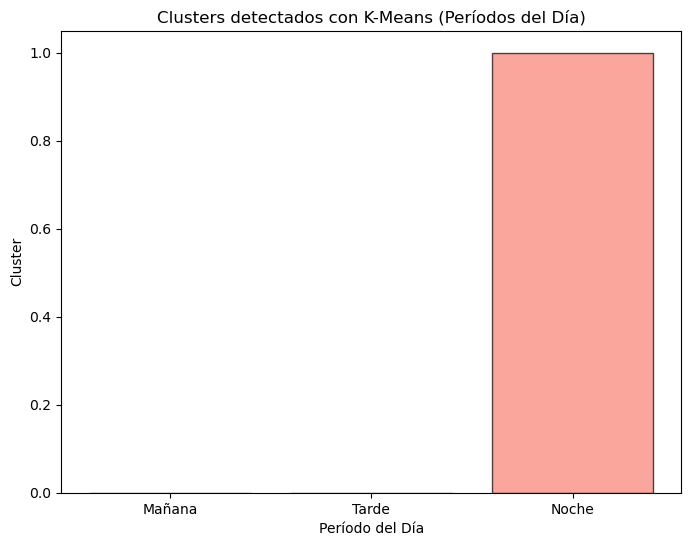

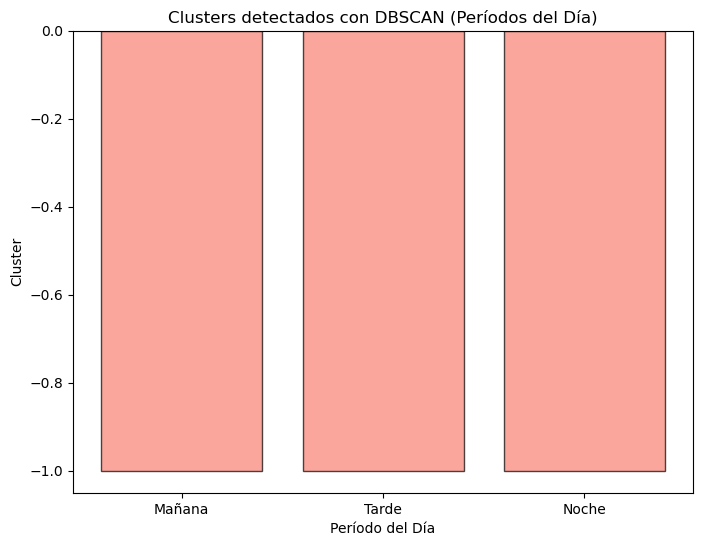

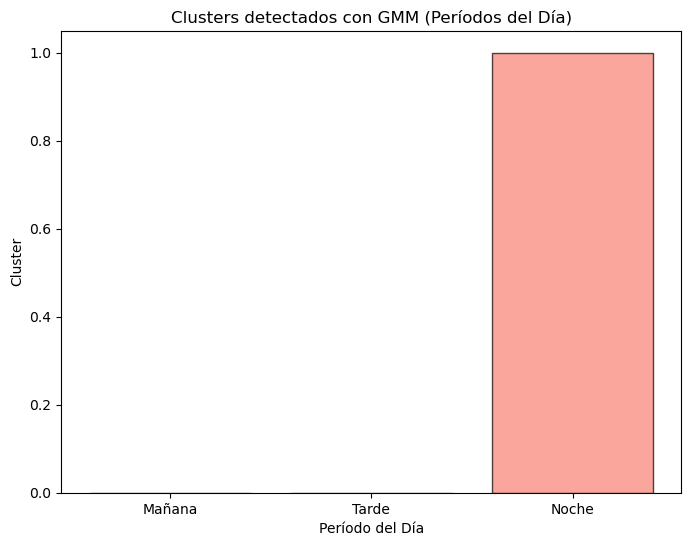

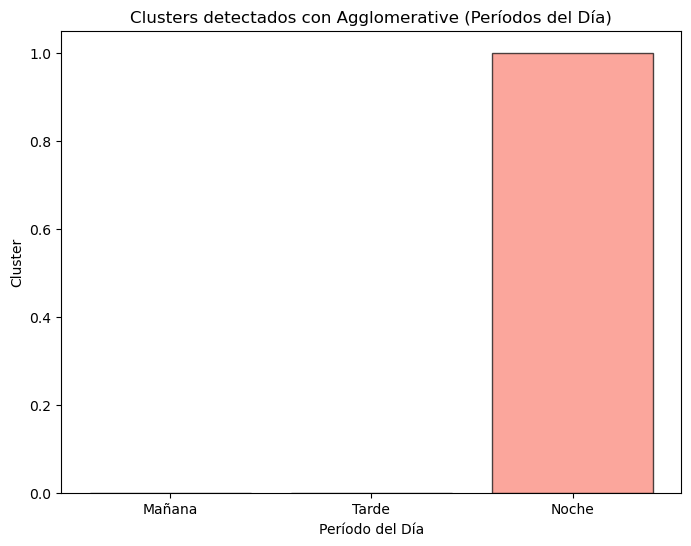

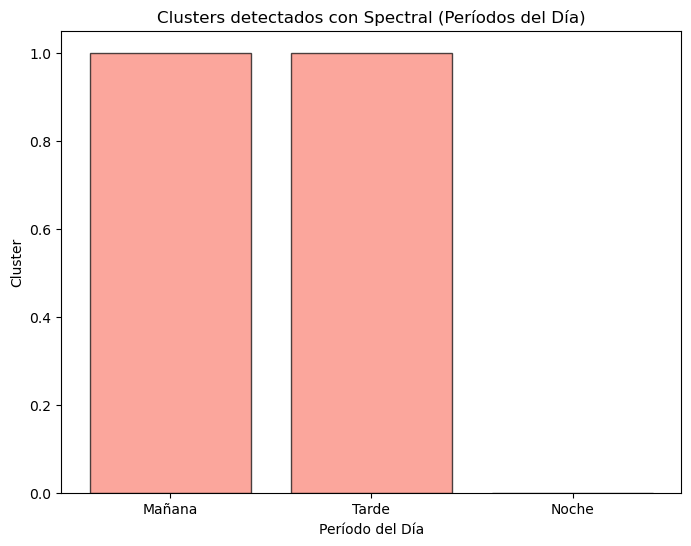

In [ ]:
# Ajustar n_neighbors según los datos
def aplicar_modelos_clustering(X, n_clusters=3):
    modelos = {
        "K-Means": KMeans(n_clusters=n_clusters, random_state=42),
        "DBSCAN": DBSCAN(eps=0.5, min_samples=2),
        "GMM": GaussianMixture(n_components=n_clusters, random_state=42),
        "Agglomerative": AgglomerativeClustering(n_clusters=n_clusters),
        "Spectral": SpectralClustering(n_clusters=n_clusters, random_state=42, 
                                       affinity='nearest_neighbors', n_neighbors=min(2, len(X))),
    }
    
    resultados = {}
    for nombre, modelo in modelos.items():
        print(f"Aplicando modelo: {nombre}")
        if nombre == "GMM":
            clusters = modelo.fit_predict(X)
        else:
            clusters = modelo.fit(X).labels_
        resultados[nombre] = clusters
    
    return resultados

# Aplicar modelos a los datos de períodos del día
resultados_periodos = aplicar_modelos_clustering(X_periodo_scaled, n_clusters=2)

# Visualizar los clusters para los períodos del día
for nombre, clusters in resultados_periodos.items():
    plt.figure(figsize=(8, 6))
    plt.bar(['Mañana', 'Tarde', 'Noche'], clusters, color="salmon", alpha=0.7, edgecolor="black")
    plt.title(f"Clusters detectados con {nombre} (Períodos del Día)")
    plt.xlabel("Período del Día")
    plt.ylabel("Cluster")
    plt.show()


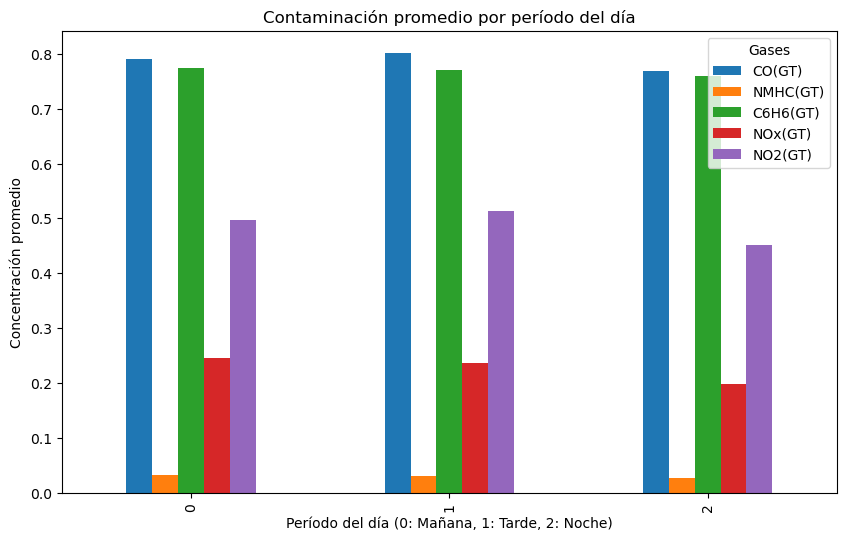

            CO(GT)  NMHC(GT)  C6H6(GT)  NOx(GT)  NO2(GT)  Cluster
PeriodoDia                                                       
0                1         0         1        0        0        0
1                1         0         1        0        1        0
2                1         0         1        0        0        1


In [45]:
# Agrupar por período del día y calcular la media de los contaminantes
df_periodo = df.groupby('PeriodoDia')[gases_contaminantes].mean()

# Visualizar los contaminantes por período del día
df_periodo.plot(kind='bar', figsize=(10, 6))
plt.title('Contaminación promedio por período del día')
plt.xlabel('Período del día (0: Mañana, 1: Tarde, 2: Noche)')
plt.ylabel('Concentración promedio')
plt.legend(title='Gases')
plt.show()

# Aplicar clustering a los períodos del día
X_periodo = df_periodo.values
kmeans_periodo = KMeans(n_clusters=2, random_state=42)
clusters_periodo = kmeans_periodo.fit_predict(X_periodo)

# Añadir etiquetas de cluster a los períodos
df_periodo['Cluster'] = clusters_periodo
print(df_periodo)
